In [114]:
from spmf import Spmf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np


In [115]:
df = pd.read_csv('classla_medjukorak.csv', sep='\t')
df_sorted = df.sort_values(by='Autor')
df_sorted['Rbr'] = range(1, len(df_sorted) + 1)
df_sorted = df_sorted[['Rbr','Autor', 'Procesiran tekst']]
df_sorted['Tekst'] = df_sorted['Procesiran tekst'].apply(lambda x: ' '.join(eval(x)))
df=df_sorted.drop(columns=['Autor', 'Procesiran tekst'])
df.to_csv('sorted_file.txt', index=False, header=False, sep='\t' )

In [71]:
spmf = Spmf("TextClusterer", input_filename="sorted_file.txt",
            output_filename="clusters.txt", arguments=[True,False])
spmf.run()


>/Users/jelenalazovic/Desktop/AutorshipAttribution/spmf.jar
========== Text Clusterer - STATS ============
 Total time ~: 56480 ms
 Max memory:0.0 mb 



In [108]:
df_clusters = pd.read_csv('clusters.txt', sep='\t')
df_unique = df_clusters.drop_duplicates(subset='RecordId')
df_unique=df_unique.sort_values(by='RecordId')
df_unique['Clusternum']=df_unique['Clusternum']+1
df_unique.to_csv('cleaned_clusters.txt', sep='\t', index=False)


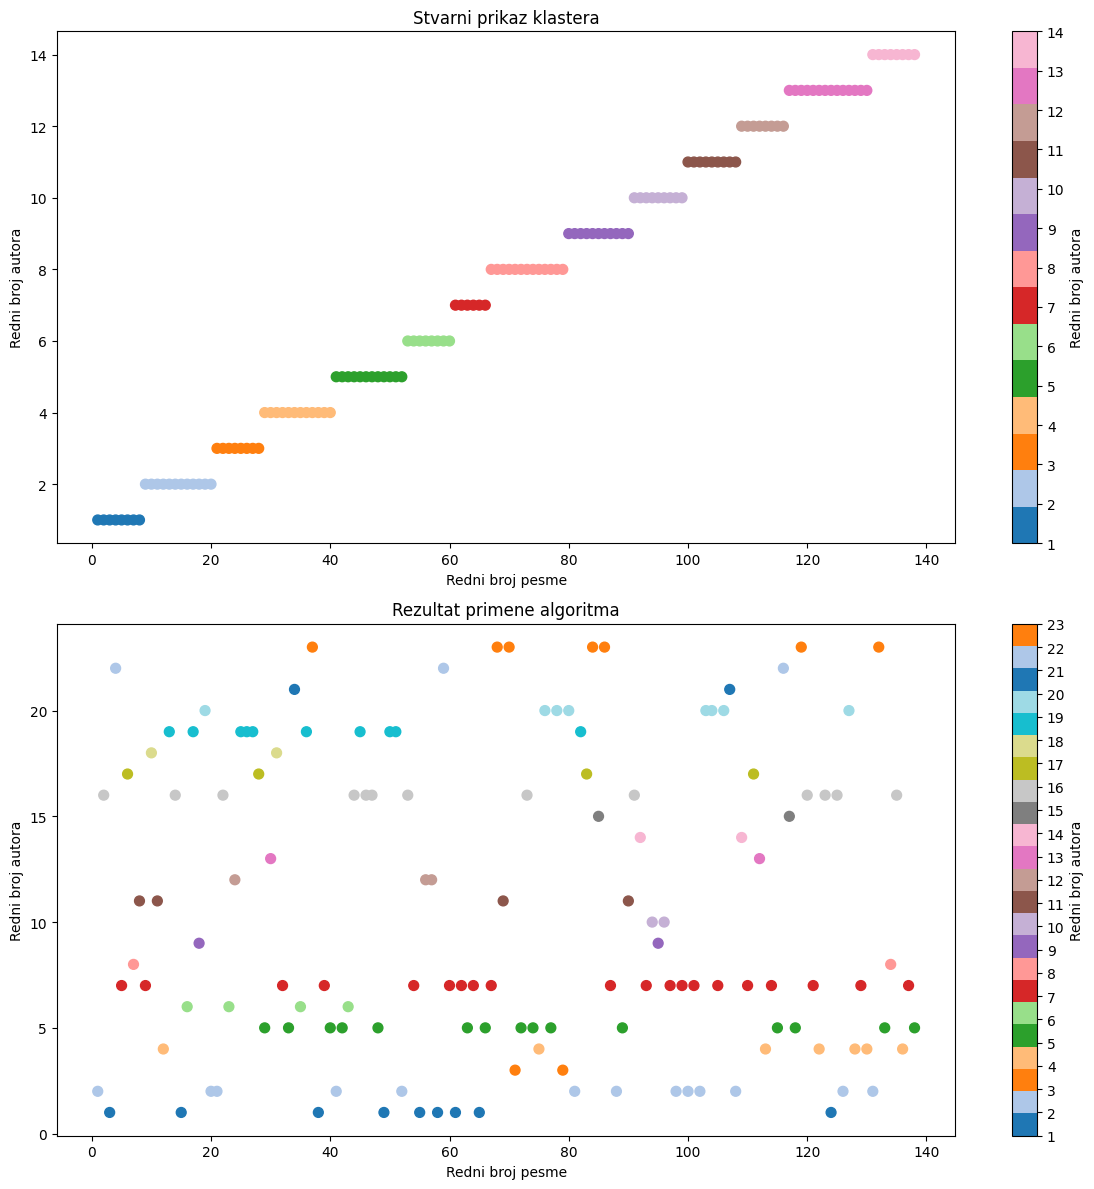

In [121]:
num_clusters = len(df_sorted['Autor'].unique())
colors = plt.cm.tab20.colors[:num_clusters]
cmap = ListedColormap(colors)

plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.scatter(df_sorted['Rbr'], df_sorted['Autor'], c=df_sorted['Autor'], cmap=cmap, marker='o', s=50)
plt.xlabel('Redni broj pesme')
plt.ylabel('Redni broj autora')
plt.title('Stvarni prikaz klastera')
plt.colorbar(label='Redni broj autora',ticks=np.arange(1, num_clusters + 1))

num_clusters2 = len(df_unique['Clusternum'].unique())
colors2 = plt.cm.tab20.colors[:num_clusters2]

# Extend the colormap by repeating some colors
extended_colors2 = colors2 * (num_clusters2 // len(colors2)) + colors2[:num_clusters2 % len(colors2)]
cmap2 = ListedColormap(extended_colors2)


plt.subplot(212)
plt.scatter(df_unique['RecordId'], df_unique['Clusternum'], c=df_unique['Clusternum'], cmap=cmap2, marker='o', s=50)
plt.xlabel('Redni broj pesme')
plt.ylabel('Redni broj autora')
plt.title('Rezultat primene algoritma')
plt.colorbar(label='Redni broj autora', ticks=np.arange(1, num_clusters2 + 1))

plt.tight_layout()
plt.show()



In [97]:
from sklearn.metrics import accuracy_score


In [110]:
accuracy = accuracy_score(df_sorted['Rbr'], df_unique['Clusternum'])

In [111]:
accuracy

0.007246376811594203